In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=15,
       titlepad=11,
      )

from sklearn.feature_selection import mutual_info_regression

In [3]:
df = pd.read_csv("Datasets/concrete.csv")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


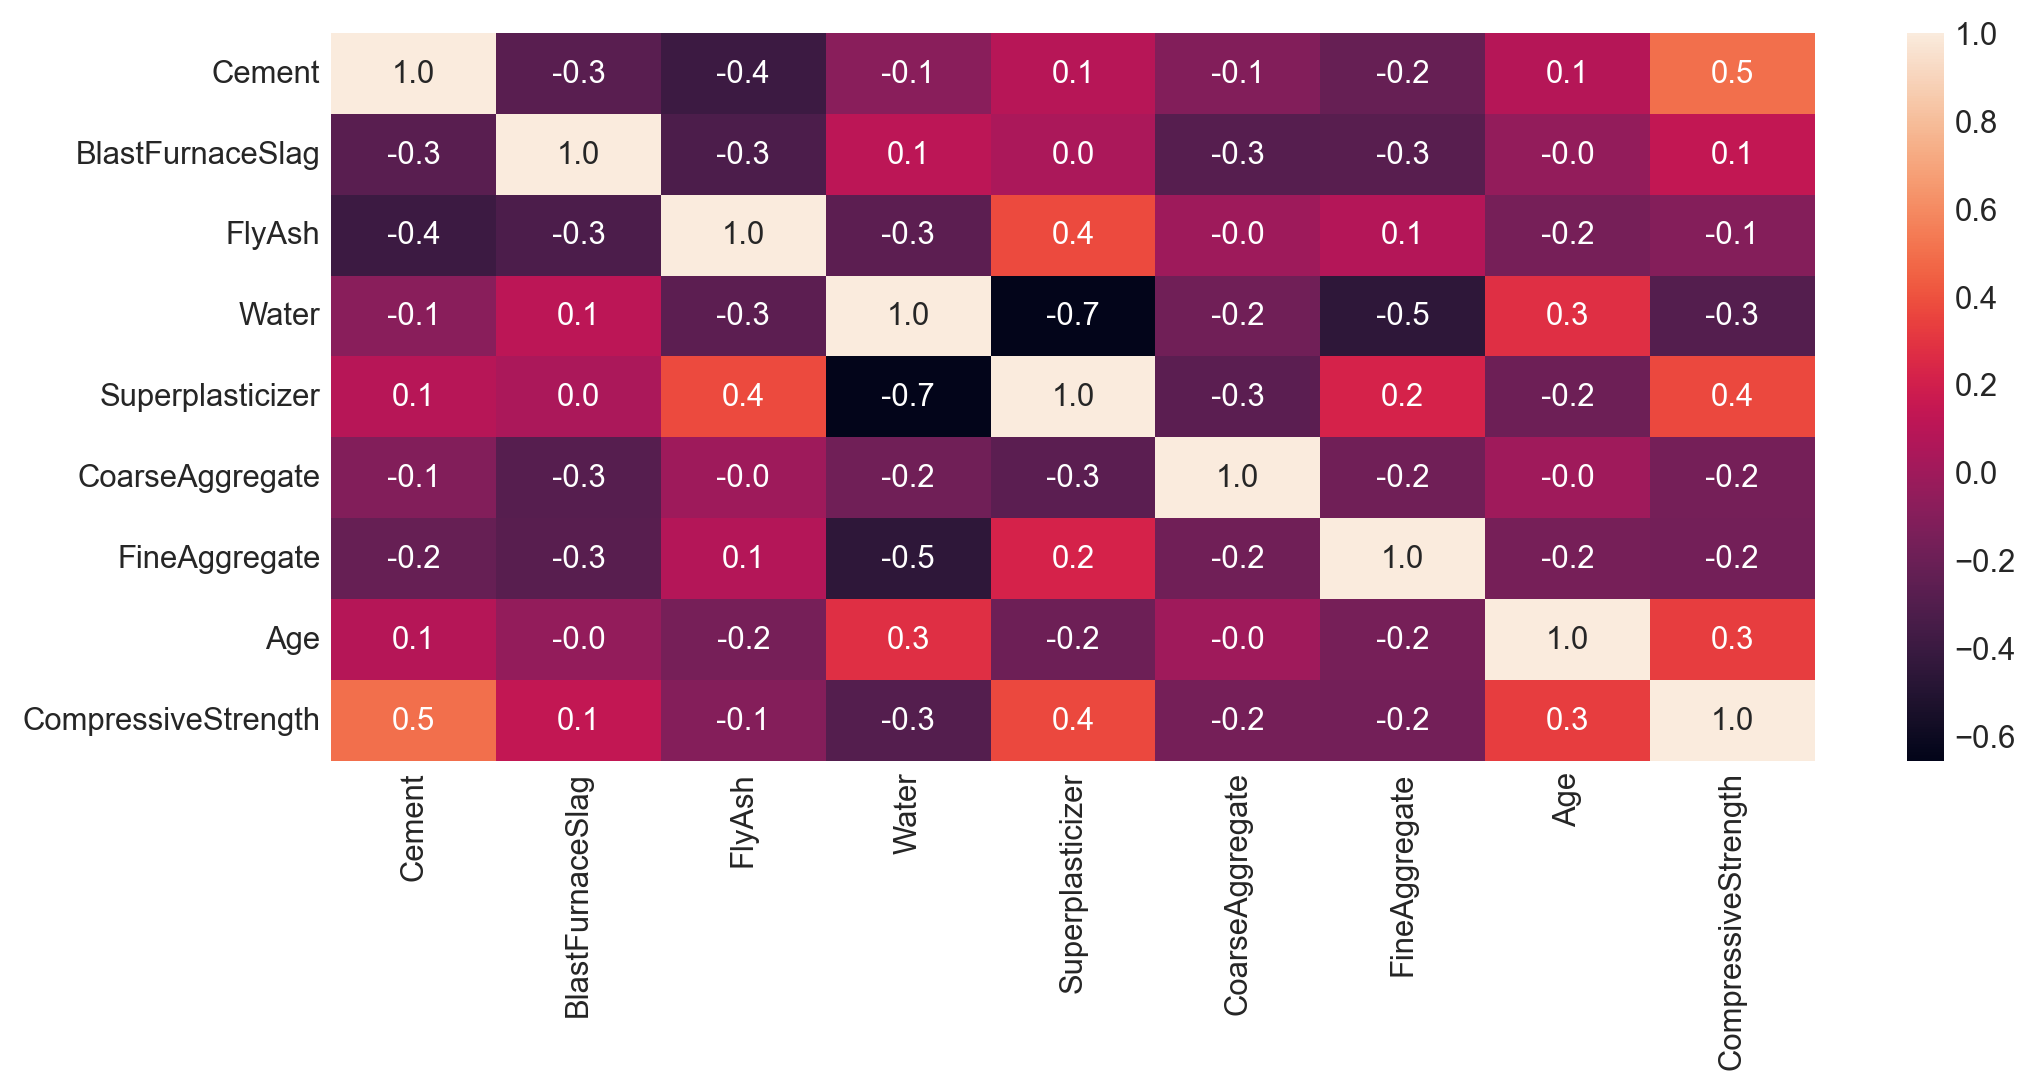

In [6]:
plt.figure(figsize=(10,5),dpi = 223)
sns.heatmap(df.corr(),
           annot=True,
            fmt='.1f'
           )
plt.show()

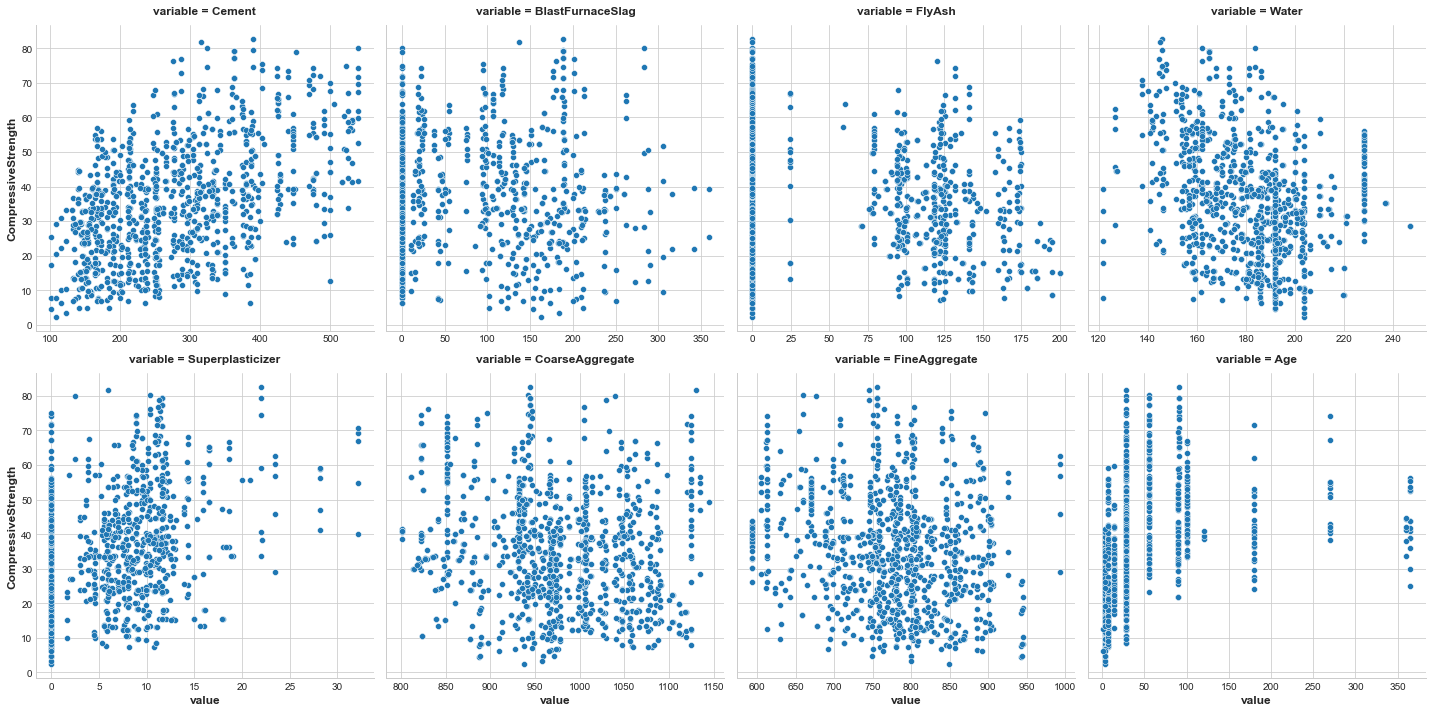

In [9]:
cantinuous = [col for col in df.columns if df[col].dtypes=='int64' or df[col].dtypes=='float64' ]
cantinuous

#Figure-level interface for drawing relational plots onto a FacetGrid.
sns.relplot(x="value", 
            y="CompressiveStrength", 
            col="variable",
            col_wrap=4,
            data=df.melt(id_vars="CompressiveStrength", value_vars=cantinuous),
            facet_kws=dict(sharex=False),
)
plt.show()

In [10]:
cat = [col for col in df.columns if df[col].dtypes=='object']
cat

[]

### Mutual Information

In [11]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
        
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

In [14]:
X = df.copy()
y = X.pop('CompressiveStrength')

mi_scores = make_mi_scores(X, y)
mi_scores

Age                 0.399457
Water               0.353731
Cement              0.307480
CoarseAggregate     0.254109
Superplasticizer    0.212838
FineAggregate       0.212487
BlastFurnaceSlag    0.180013
FlyAsh              0.123248
Name: MI Scores, dtype: float64

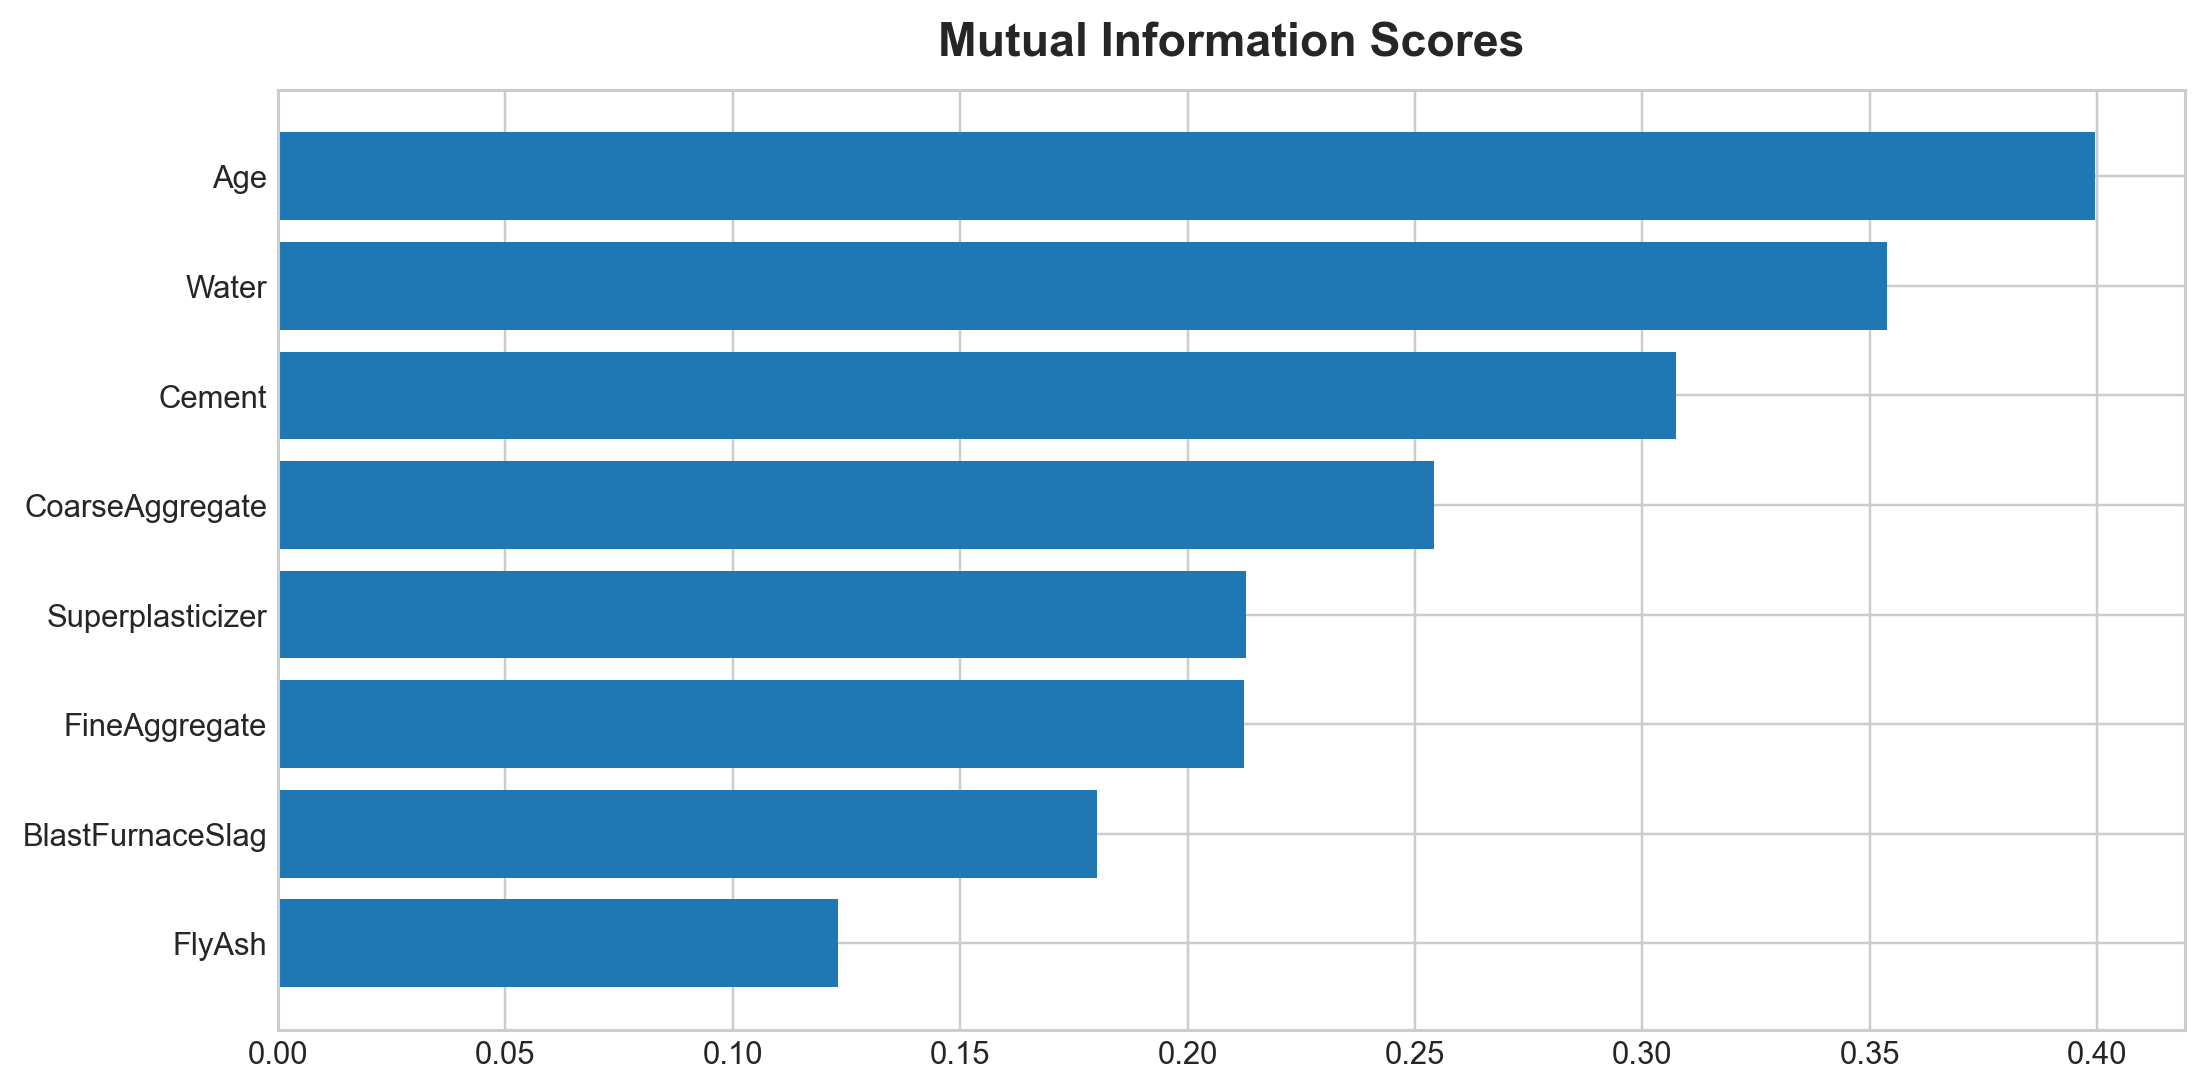

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=223, figsize=(10, 5))
plot_mi_scores(mi_scores)

#### Count the non zeros values row wise

In [21]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
df["Components"] = df[components].gt(0).sum(axis=1)

df[components + ["Components"]].sample(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,6
844,298.0,137.0,107.0,201.0,6.0,878.0,655.0,7
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,5
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,6
860,314.0,0.0,113.0,170.0,10.0,925.0,783.0,6
372,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,6
248,238.1,0.0,94.1,186.7,7.0,949.9,847.0,6
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,4
674,236.0,157.0,0.0,192.0,0.0,972.6,749.1,5
174,401.8,94.7,0.0,147.4,11.4,946.8,852.1,6


In [22]:
df[components].gt(0).sum(axis=1)

0       5
1       5
2       5
3       5
4       5
       ..
1025    7
1026    6
1027    7
1028    6
1029    7
Length: 1030, dtype: int64